・制限<br>
1. セッションが切れてから実行データが保たれる時間90分<br>
2. 12時間でリセット

・GPU設定<br>
1. 「編集」→「ノートブックの設定」　GPUを選択して保存

・GPU設定確認<br>
1. 「ランタイム」→「セッションの管理」でGPU表示があればOK

In [ ]:
#@title #**Setup**

!pip install git+https://github.com/rinnakk/japanese-stable-diffusion
!pip install tensorflow==2.8.0 tensorboard==2.8.0

In [ ]:
#@title #**Login**
#@markdown **huggingface_hubのトークンが必要です。アカウント作成、トークンを発行したのち、<br>https://huggingface.co/settings/tokens で<br>アクセストークンをコピーして実行中に出る入力欄に貼り付けてください。<br>**
!huggingface-cli login

In [ ]:
#@title #**Select AI**

import torch
from torch import autocast

#@markdown **生成モデル選択<br>**
use = True #@param {type:"boolean"}
#@markdown **✅japanese_stabele_diffusion<br>🟩waifu_diffusion**
select_ai = ""

if (use):
  from diffusers import LMSDiscreteScheduler
  from japanese_stable_diffusion import JapaneseStableDiffusionPipeline

  model_id = "rinna/japanese-stable-diffusion"
  device = "cuda"
  # Use the K-LMS scheduler here instead
  scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
  pipe = JapaneseStableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True)
  pipe = pipe.to(device)
  select_ai = "japanese-stable-diffusion"
  print("\n◆◇◆◇◆◇◆◇◆◇\njapanese-stable-diffusionを使用します。\nプロンプトは日本語でも入力可能です。")
else:
  from diffusers import StableDiffusionPipeline

  pipe = StableDiffusionPipeline.from_pretrained(
      "hakurei/waifu-diffusion",
      torch_dtype=torch.float32
  ).to("cuda")
  select_ai = "waifu-diffusion"
  print("\n◆◇◆◇◆◇◆◇◆◇\nwaifu-diffusionを使用します。\nプロンプトは英語で入力してください。")

In [ ]:
#@title #**画像生成**
input_prompt = "\u5E7B\u60F3\u7684\u306A\u5915\u967D\u304C\u6C88\u3080\u6D77\u8FBA\u306B\u73FE\u308C\u305F\u7F8E\u3057\u3044\u4EBA\u9B5A\u306E\u7D75\u753B" #@param {type:"string"}

if (select_ai == "japanese-stable-diffusion" and input_prompt != ""):
  prompt = input_prompt #生成用プロンプト
  with autocast("cuda"):
      image = pipe(prompt, guidance_scale=7.5)[0][0]
elif (select_ai == "waifu-diffusion" and input_prompt != ""):
  prompt = input_prompt
  with autocast("cuda"):
      image = pipe(prompt, guidance_scale=6)[0][0]
else:
  print("処理できません。前工程の確認またはプロンプトを入力してください。")

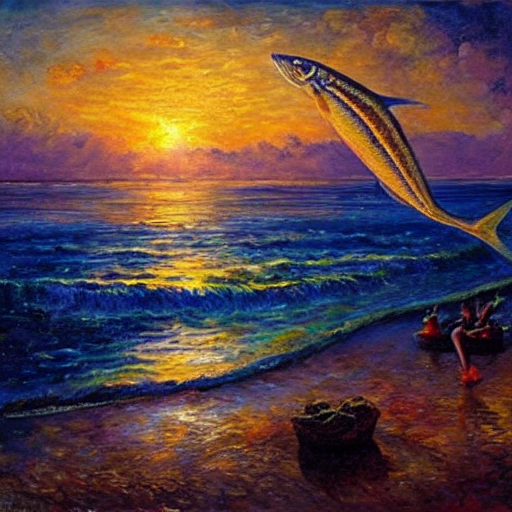

In [ ]:
#@title #**結果の出力**
#@markdown **保存選択<br>**
save = False #@param {type:"boolean"}
#@markdown **✅保存する<br>🟩出力のみ**

if save:
  image.save("generate.png")
else:
  image